                      ACCIDENT ANALYSIS ON AVIATION
 
Welcome! This notebook introduces an entry-level data analysis project centered on aviation accident data. The goal is to uncover patterns, trends, and meaningful insights from real-world aviation incidents. The project includes steps such as data cleaning, exploratory data analysis (EDA), and visualizing findings using Python tools.


This beginner-level project explores patterns in aviation accident data. It involves cleaning the dataset, analyzing trends, and visualizing key insights using Python tools like Pandas, Matplotlib, and Seaborn.

The dataset was sourced from Kaggle. 


                    Business Understanding

Understanding aviation accident data can help identify common causes, risk factors, and safety patterns. The main goal is to find useful insights from past accidents to improve safety and awareness.

We will ask questions like:
* How have accidents changed over time?
* Do weather or flight phases influence severity?
* What are the most common accident outcomes?
* what are the loacations with the most accidents ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



                Data Understanding

We begin by loading and exploring the dataset.

Key information includes:
- Accident date and location
- Weather conditions
- Phase of flight
- Injury details (fatal, serious, minor)
- Flight purpose

We'll look at the first few rows and check for missing values, types of data, and general structure.


In [2]:
# Use ISO-8859-1 encoding for files with accented or special characters
df = pd.read_csv(r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\git_practice\AviationData.csv", encoding='ISO-8859-1',low_memory=False)

#print the first 5 rows
#show rows and columns
# print column names 
print(df.head())
print(df.shape)
print(df.columns)

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

                    Data Preparation(data cleaning)

In this step, we clean the data by:
- Converting date columns
- Removing rows with missing or invalid values
- Standartize key columns to lowercase
- Filtering unnecessary columns
- Checking and removing outliers
-  checking and Removing duplicates 
- keeping and reodering important columns
- dropping columns with missing values


In [3]:
#change column names to lowercase and replace spaces with underscores
#check columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [4]:
# convert event_date to datetime and coerce errors
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')

# Drop rows with invalid or unrecognized event dates
df = df.dropna(subset=['event.date'])

#create a year column for analysis
df['year'] = df['event.date'].dt.year
df.head()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [5]:
# Handling missing values
# Fill missing values in text columns with 'unknown'
df['weather.condition'] = df['weather.condition'].fillna('unknown')
df['broad.phase.of.flight'] = df['broad.phase.of.flight'].fillna('unknown')
df['purpose.of.flight'] = df['purpose.of.flight'].fillna('unknown')
df.head()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [6]:
# converting injury columns and filing missing values
# List of injury columns
injury_cols = ['total.fatal.injuries', 'total.serious.injuries',
               'total.minor.injuries', 'total.uninjured']

# Convert to numeric and fill missing with 0
for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
df.head()


,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [7]:
#standartize key columns to lowercase
# Convert key text columns to lowercase for consistency
df['weather.condition'] = df['weather.condition'].str.lower()
df['broad.phase.of.flight'] = df['broad.phase.of.flight'].str.lower()
df['purpose.of.flight'] = df['purpose.of.flight'].str.lower()
df.tail()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date,year
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,unknown,unknown,NaN,29-12-2022,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,unknown,unknown,NaN,NaN,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,vmc,unknown,NaN,27-12-2022,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,unknown,unknown,NaN,NaN,2022
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,unknown,unknown,NaN,30-12-2022,2022


In [8]:
# removing duplicates
# Remove duplicate rows if any
df = df.drop_duplicates()

df.tail()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date,year
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,unknown,unknown,NaN,29-12-2022,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,unknown,unknown,NaN,NaN,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,vmc,unknown,NaN,27-12-2022,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,unknown,unknown,NaN,NaN,2022
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,unknown,unknown,NaN,30-12-2022,2022


In [9]:
# checking for outliers in fatalities
# Investigate unusually high fatality counts
df[df['total.fatal.injuries'] > 10][['event.date', 'location', 'total.fatal.injuries']]

# Drop outliers where fatal injuries are clearly incorrect
df = df[df['total.fatal.injuries'] <= 1000]
# Check how many rows had >100 fatalities before
(df['total.fatal.injuries'] > 1000).sum()



0

In [10]:
# keeping important columns
# Reduce the dataset to relevant columns for simplicity
columns_to_keep = [
    'event.date', 'year', 'location', 'country',
    'weather.condition', 'broad.phase.of.flight',
    'purpose.of.flight', 'total.fatal.injuries',
    'total.serious.injuries', 'total.minor.injuries',
    'total.uninjured',
]

df = df[columns_to_keep]

df.head()

,event.date,year,location,country,weather.condition,broad.phase.of.flight,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
0,1948-10-24,1948,"MOOSE CREEK, ID",United States,unk,cruise,personal,2.0,0.0,0.0,0.0
1,1962-07-19,1962,"BRIDGEPORT, CA",United States,unk,unknown,personal,4.0,0.0,0.0,0.0
2,1974-08-30,1974,"Saltville, VA",United States,imc,cruise,personal,3.0,0.0,0.0,0.0
3,1977-06-19,1977,"EUREKA, CA",United States,imc,cruise,personal,2.0,0.0,0.0,0.0
4,1979-08-02,1979,"Canton, OH",United States,vmc,approach,personal,1.0,2.0,0.0,0.0


In [11]:
# Reodering columns to most important ones
df = df[['event.date', 'year', 'location', 'country', 
         'weather.condition', 'broad.phase.of.flight', 
         'purpose.of.flight', 'total.fatal.injuries',
         'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']]
df.head(10)


,event.date,year,location,country,weather.condition,broad.phase.of.flight,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
0,1948-10-24,1948,"MOOSE CREEK, ID",United States,unk,cruise,personal,2.0,0.0,0.0,0.0
1,1962-07-19,1962,"BRIDGEPORT, CA",United States,unk,unknown,personal,4.0,0.0,0.0,0.0
2,1974-08-30,1974,"Saltville, VA",United States,imc,cruise,personal,3.0,0.0,0.0,0.0
3,1977-06-19,1977,"EUREKA, CA",United States,imc,cruise,personal,2.0,0.0,0.0,0.0
4,1979-08-02,1979,"Canton, OH",United States,vmc,approach,personal,1.0,2.0,0.0,0.0
5,1979-09-17,1979,"BOSTON, MA",United States,vmc,climb,unknown,0.0,0.0,1.0,44.0
6,1981-08-01,1981,"COTTON, MN",United States,imc,unknown,personal,4.0,0.0,0.0,0.0
7,1982-01-01,1982,"PULLMAN, WA",United States,vmc,takeoff,personal,0.0,0.0,0.0,2.0
8,1982-01-01,1982,"EAST HANOVER, NJ",United States,imc,landing,business,0.0,0.0,0.0,2.0
9,1982-01-01,1982,"JACKSONVILLE, FL",United States,imc,cruise,personal,0.0,0.0,3.0,0.0


In [12]:
#removing columns with missing values 
# Drop columns with more than 90% missing values
threshold = len(df) * 0.9
df = df.dropna(thresh=threshold, axis=1)
df = df.drop_duplicates()
df.head(10)

,event.date,year,location,country,weather.condition,broad.phase.of.flight,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
0,1948-10-24,1948,"MOOSE CREEK, ID",United States,unk,cruise,personal,2.0,0.0,0.0,0.0
1,1962-07-19,1962,"BRIDGEPORT, CA",United States,unk,unknown,personal,4.0,0.0,0.0,0.0
2,1974-08-30,1974,"Saltville, VA",United States,imc,cruise,personal,3.0,0.0,0.0,0.0
3,1977-06-19,1977,"EUREKA, CA",United States,imc,cruise,personal,2.0,0.0,0.0,0.0
4,1979-08-02,1979,"Canton, OH",United States,vmc,approach,personal,1.0,2.0,0.0,0.0
5,1979-09-17,1979,"BOSTON, MA",United States,vmc,climb,unknown,0.0,0.0,1.0,44.0
6,1981-08-01,1981,"COTTON, MN",United States,imc,unknown,personal,4.0,0.0,0.0,0.0
7,1982-01-01,1982,"PULLMAN, WA",United States,vmc,takeoff,personal,0.0,0.0,0.0,2.0
8,1982-01-01,1982,"EAST HANOVER, NJ",United States,imc,landing,business,0.0,0.0,0.0,2.0
9,1982-01-01,1982,"JACKSONVILLE, FL",United States,imc,cruise,personal,0.0,0.0,3.0,0.0


In [13]:
# filling missing values with "uknown"
df['location'] = df['location'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df.head(10)

,event.date,year,location,country,weather.condition,broad.phase.of.flight,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
0,1948-10-24,1948,"MOOSE CREEK, ID",United States,unk,cruise,personal,2.0,0.0,0.0,0.0
1,1962-07-19,1962,"BRIDGEPORT, CA",United States,unk,unknown,personal,4.0,0.0,0.0,0.0
2,1974-08-30,1974,"Saltville, VA",United States,imc,cruise,personal,3.0,0.0,0.0,0.0
3,1977-06-19,1977,"EUREKA, CA",United States,imc,cruise,personal,2.0,0.0,0.0,0.0
4,1979-08-02,1979,"Canton, OH",United States,vmc,approach,personal,1.0,2.0,0.0,0.0
5,1979-09-17,1979,"BOSTON, MA",United States,vmc,climb,unknown,0.0,0.0,1.0,44.0
6,1981-08-01,1981,"COTTON, MN",United States,imc,unknown,personal,4.0,0.0,0.0,0.0
7,1982-01-01,1982,"PULLMAN, WA",United States,vmc,takeoff,personal,0.0,0.0,0.0,2.0
8,1982-01-01,1982,"EAST HANOVER, NJ",United States,imc,landing,business,0.0,0.0,0.0,2.0
9,1982-01-01,1982,"JACKSONVILLE, FL",United States,imc,cruise,personal,0.0,0.0,3.0,0.0


In [14]:
print(df.shape)


(88521, 11)


In [15]:
#checking for missing values

df.isnull().sum()


event.date                0
year                      0
location                  0
country                   0
weather.condition         0
broad.phase.of.flight     0
purpose.of.flight         0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
dtype: int64

         Saving the Cleaned Dataset

After cleaning the data, I save it into a new CSV file for future use. This helps us avoid repeating the cleaning process every time I run the notebook. 

I used Python’s `os` module to build the correct file path and store the file neatly inside the `data/clean/` folder of our project.


In [16]:
import os

clean_folder = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\git_practice\data\clean"
os.makedirs(clean_folder, exist_ok=True)


In [17]:
# Save as CSV file(index set to false)
df.to_csv(os.path.join(clean_folder, "aviation_clean.csv"), index=False)


In [18]:
import os

clean_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\git_practice\data\clean\aviation_clean.csv"

os.path.exists(clean_path)


True

- Used (df.describe) to diplay the summary of the statistics
- Used a boxplot  see the distribution, median, quartiles, and any outlier

In [19]:

#display statistical summary
df.describe()




,year,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
count,88521.000000,88521.00000,88521.000000,88521.000000,88521.000000
mean,1999.224964,0.55902,0.240971,0.309034,4.890580
std,11.891262,4.99464,1.437274,2.084040,26.547929
min,1948.000000,0.00000,0.000000,0.000000,0.000000
25%,1989.000000,0.00000,0.000000,0.000000,0.000000
50%,1998.000000,0.00000,0.000000,0.000000,1.000000
75%,2009.000000,0.00000,0.000000,0.000000,2.000000
max,2022.000000,349.00000,161.000000,380.000000,699.000000


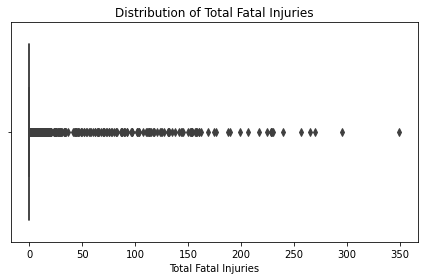

In [20]:

# Create a boxplot of the total number of fatal injuries
# This helps us see the distribution, median, quartiles, and any outliers

sns.boxplot(x=df["total.fatal.injuries"])
plt.title("Distribution of Total Fatal Injuries")
plt.xlabel("Total Fatal Injuries")
plt.tight_layout()
plt.show()

  - Reading the new dataset
  -  I Standardized the weather condition values to ensure consistency in our categorical data for accurate analysis and visualization
    

df = pd.read_csv("data/clean/aviation_clean.csv")


df.head()


In [21]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 88521 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event.date              88521 non-null  datetime64[ns]
 1   year                    88521 non-null  int64         
 2   location                88521 non-null  object        
 3   country                 88521 non-null  object        
 4   weather.condition       88521 non-null  object        
 5   broad.phase.of.flight   88521 non-null  object        
 6   purpose.of.flight       88521 non-null  object        
 7   total.fatal.injuries    88521 non-null  float64       
 8   total.serious.injuries  88521 non-null  float64       
 9   total.minor.injuries    88521 non-null  float64       
 10  total.uninjured         88521 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 8.1+ MB


In [22]:

# Standardize the weather condition values by replacing 'unk' with 'unknown'
df['weather.condition'] = df['weather.condition'].replace({'unk': 'unknown'})

                 Exploratory Data Analysis (EDA)

I explored the cleaned dataset using visualizations and summary statistics to find patterns and answer key questions.


               Univariate Analysis

I analyzed single variables like:
- Accident frequency per year
- Most common weather condition
- Injury severity counts

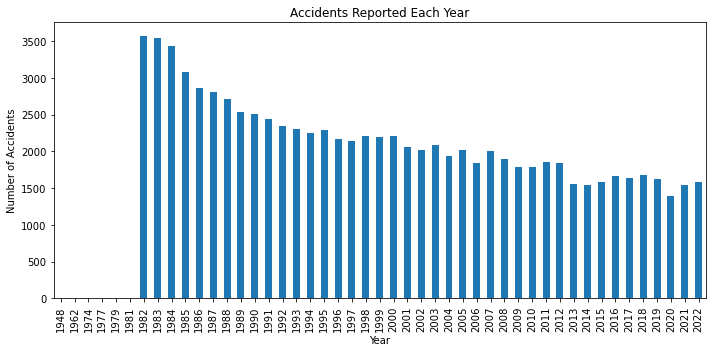

In [23]:
# Plot the number of accidents that occurred each year as a bar chart
# for understanding  accident frequency over time
# Set the size of the plot to 10 inches wide by 5 inches tall
# Count the number of accidents per year, sort by year, and create a bar plot
# set the title
# label x-axis as year
# label y-axis as number of accidents
# adjusting  the layout to prevent overlapping
# show

plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents Reported Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


The bar chart shows a clear downward trend in reported aviation accidents over the years, indicating major progress in flight safety. Higher accident rates in earlier years have steadily declined, with recent years reflecting more consistent and lower numbers. This suggests that advancements in aircraft technology, safety protocols, and regulatory measures have played a key role in reducing aviation incidents.


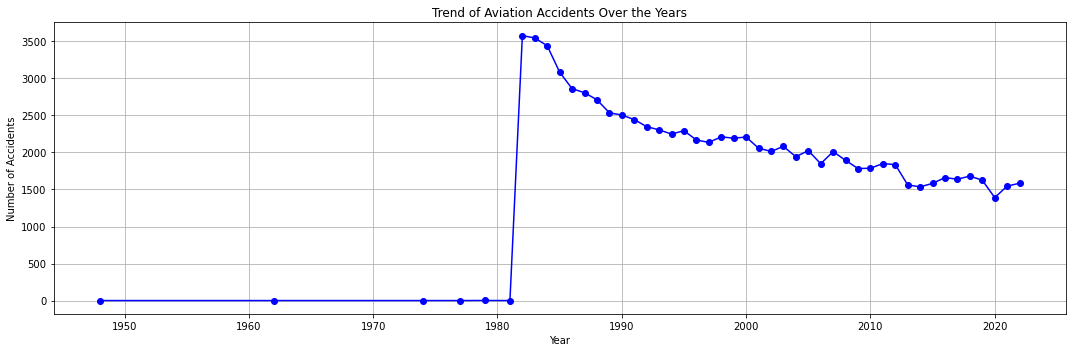

In [24]:
# Show accident trends over time using a line chart
# Count the number of accidents per year and sort the years in ascending order
# Plot the accident trend over time using a line chart with markers
# Add circular markers on each data point
# Set the figure size to (15,5)inches
# Set line color as blue
# Aad the title and label the x and y axis
# setting a grid for readability and adjusting the layut 
# show the pot
accident_trend = df['year'].value_counts().sort_index()
accident_trend.plot(
    kind='line',
    marker='o',
    figsize=(15, 5),
    title='Trend of Aviation Accidents Over the Years',
    color='blue'
)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


   The line chart reveals a significant rise in reported aviation accidents at a certain point, which is followed by a steady decrease over time. This trend highlights improvements in aviation safety and regulations. The stabilization of accident numbers in recent years may suggest that safety has reached a relatively consistent level, though continued efforts are still necessary to drive numbers even lower

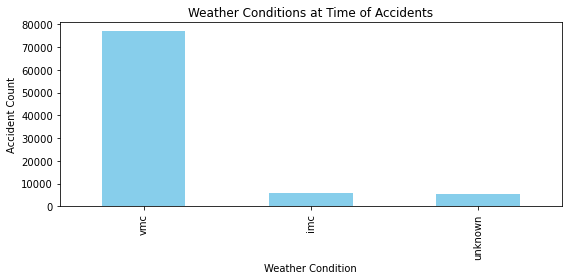

In [25]:
# Plot a bar chart showing the distribution of weather conditions during accidents
# helps us understand whether poor weather contributes to accidents
# Set the size of the plot to (8,4)inches
# Count the number of accidents for each weather condition and create a bar plot using sky blue as color
# Setting the title and label the x and y axis
# adjusting the plot to avoid overlapping
#show the plot
plt.figure(figsize=(8, 4))
df['weather.condition'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Weather Conditions at Time of Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()


The chart indicates that the majority of aviation accidents occur during clear weather conditions, while incidents in poor weather such as fog or rain are relatively rare. This likely reflects the higher number of flights conducted in clear weather rather than it being more hazardous. The data suggests that although adverse weather is dangerous, its impact on accident frequency is limited by fewer flights being scheduled under such conditions

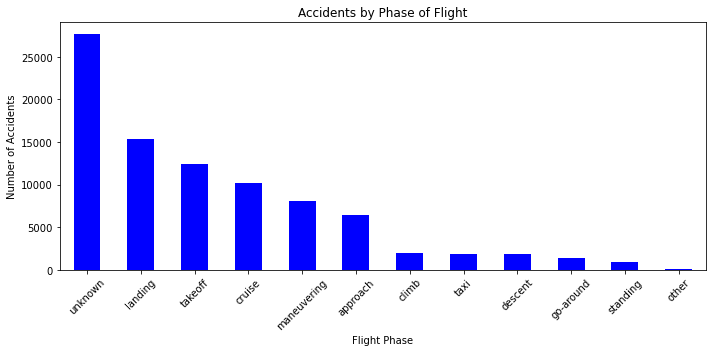

In [26]:
# Plot a bar chart showing which phase of flight accidents happened (e.g. takeoff, landing)
# This shows which stages of flight are most risky
# Set the plot figure to (10,5)inches
# Count the number of accidents in each phase of flight and plot as a bar char use blue as color
# Adding the title and labelling the x and y axis 
# Rotate the x-axis labels by 45 degrees for better readability
# Adjust the layout to prevent overlaps
# display the plot

plt.figure(figsize=(10, 5)) 
df['broad.phase.of.flight'].value_counts().plot(kind='bar', color='blue')
plt.title('Accidents by Phase of Flight')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




The bar chart illustrates the distribution of aviation accidents across various phases of flight. Most incidents occur during the landing phase, followed by takeoff, cruise, and approach. These phases involve complex maneuvers and changes in speed or altitude, which may increase the risk of accidents. In contrast, phases like taxiing, standing, and descent have significantly fewer incidents, likely due to lower operational intensity. This insight helps identify the most vulnerable moments during flight operations.


In [27]:
# Display the range of years
print("Min year:", df['year'].min())
print("Max year:", df['year'].max())


Min year: 1948
Max year: 2022


          Bivariate Analysis
I examined relationships between two variables, such as:
- Flight phase vs. fatal injuries
- Year vs. accident count
- Weather vs. injury type


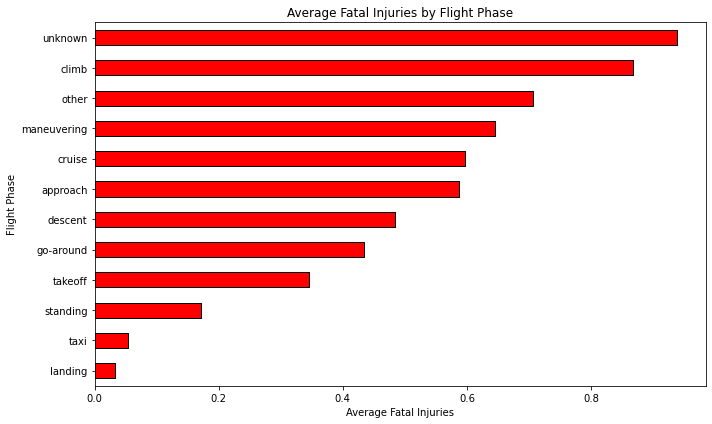

In [28]:
 ## Identify which flight phases tend to have higher average fatal injuries and recognizing patterns

# Group the data by flight phase and calculate the average number of fatal injuries for each group
# Use a horizontal bar chart and set color to red and a black border
# Set figure to (10,6)inches
# Set the title and label both x and y axis
# Adjust layout to prevent overlapping 
# Display the horizontal bar chart
df.groupby('broad.phase.of.flight')['total.fatal.injuries'].mean().sort_values().plot(
    kind='barh',
    color='red',
    edgecolor='black',
    figsize=(10, 6),
    title='Average Fatal Injuries by Flight Phase'
)
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Flight Phase')
plt.tight_layout()
plt.show()


           Fatal Injuries by Flight Phase

This visualization compares different phases of flight based on the total number of fatal injuries. It highlights that although cruise-related accidents aren't the most common, they tend to result in the highest number of fatalities. Similarly, phases like approach, maneuvering, and takeoff show a significant number of deaths, suggesting these moments carry greater risk. On the other hand, incidents that occur during taxiing or when the aircraft is stationary generally involve far fewer fatalities, likely due to lower speeds and more controlled conditions.


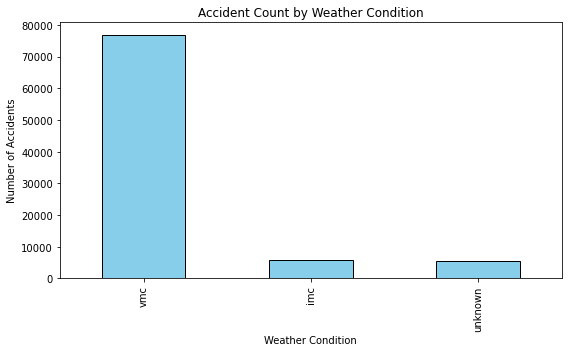

In [29]:
# Number of accidents by weather condition

 # Count accidents for each weather condition and plot as a bar chart
 # Specify bar type and use color as skyblue and edge color as black
 # Set figure size to (8,5)inches 
 # Add the title and label both x and y axis
 # Adjust layout to prevent overlapping 
 # Display the plotted bar chart   
df['weather.condition'].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    figsize=(8, 5),
    title='Accident Count by Weather Condition'
)

plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


     Total Accidents by Meteorological Conditions

This chart shows a bivariate analysis of weather conditions and accident counts. VMC (good weather) has the highest number of accidents, while IMC and  unknown have much lower counts. This suggests that most accidents happen in clear weather, possibly because there are more flights or pilots may be less cautious. It highlights that good weather does not always mean safer outcomes.


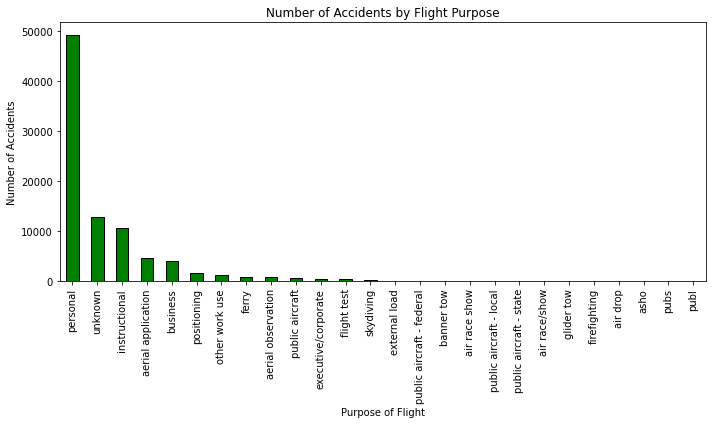

In [30]:
# Count of accidents by purpose of flight

# Count the number of accidents for each flight purpose and plot as a bar chart
# Specify kind to bar set color as green and black as edge color
# Set figure size to (10,6) inches
# Add the title and label both y and x axis
# Adjust layout to prevent overlapping
# Display the bar chart

df['purpose.of.flight'].value_counts().plot(
    kind='bar',
    color='green',
    edgecolor='black',
    figsize=(10, 6),
    title='Number of Accidents by Flight Purpose'
)

plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


         Total Accidents by Purpose of Flight

This chart shows a bivariate analysis of the purpose of flight and accident count. One purpose has a much higher number of accidents than the others. This suggests that accidents are more common for that type of operation, possibly due to higher flight hours or different safety practices. Other purposes have fewer accidents but still represent important safety concerns.


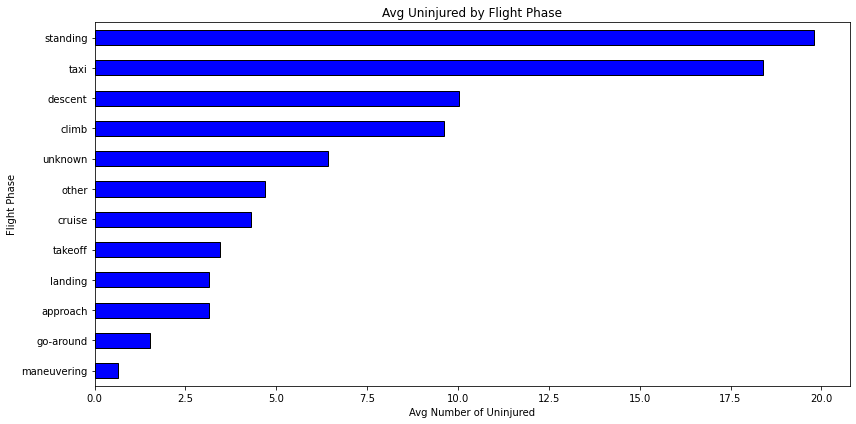

In [31]:
# Plot average number of uninjured passengers by phase of flight

# Set figure size to (12,6 )inches
# Group data by flight phase, calculate average number of uninjured per phase, and sort the values
# Use a horizontal bar chart set color as blue and  edgecolor as black
# Add the title and label both the x and y axis 
# Adjsut the layout so that overlapping does not occur
# show the horizontal bar chart

plt.figure(figsize=(12,6))
df.groupby('broad.phase.of.flight')['total.uninjured'].mean().sort_values().plot(
    kind='barh', color='blue', edgecolor='black'
)
plt.title('Avg Uninjured by Flight Phase')
plt.xlabel('Avg Number of Uninjured')
plt.ylabel('Flight Phase')
plt.tight_layout()
plt.show()


         Average number of unijured  by Broad flight phase

This chart shows a bivariate analysis of broad category and the average number of uninjured people. Some categories have a much higher average of uninjured, suggesting better survivability or less severe accidents. Other categories have lower averages, indicating higher risk of injuries or fatalities in those types of events.


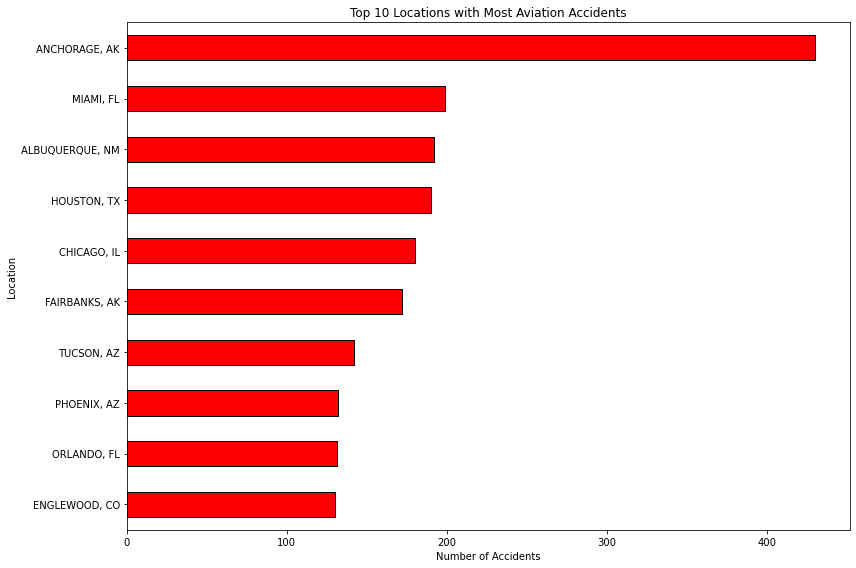

In [32]:
# Plot top 10 accident locations
# Calculate the top 10 locations with the highest number of accidents
top_locations = df['location'].value_counts().head(10)

# Set figure size to (12,8) inches
# plot a  horizontal barchart , set color as red and edge color as black
# Add the title and label both y and x axis
# Inverted the y axis so that location with the most  accidents to appear at the top
# Adjust the layout to prevent overlapping
# Display thw horizontal bar chart
plt.figure(figsize=(12,8))
top_locations.plot(kind='barh', color='red', edgecolor='black')
plt.title('Top 10 Locations with Most Aviation Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Location')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


              Number of Accidents by Location
This chart shows a bivariate analysis of location and the number of accidents. ANCHORAGE, AK has the most  number accidents than any other location then MIAMI,FL............to ENGLEWOOD, CO as  the 10 th location with highest number of accidents

This distribution helps identify which locations may need targeted safety interventions or further investigation to understand the underlying causes of higher accident rates

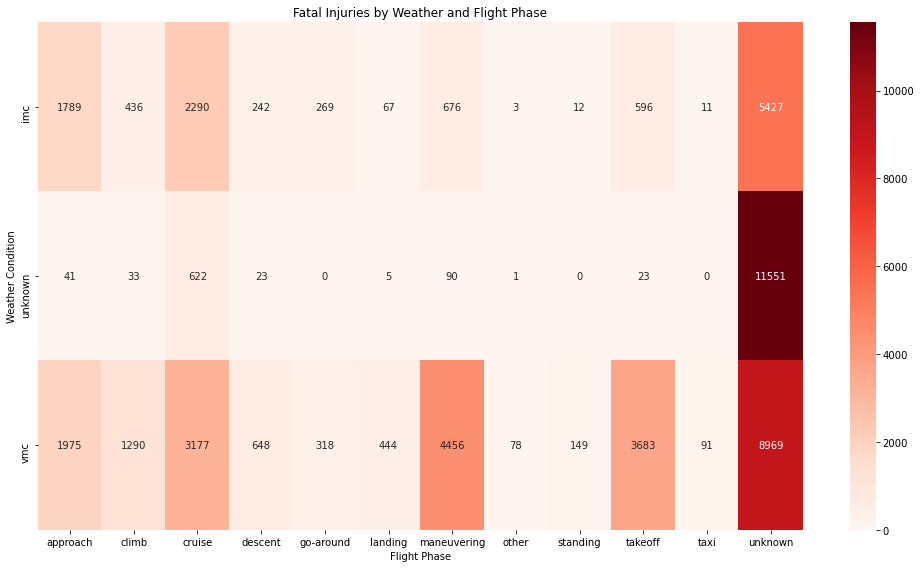

In [33]:

# Group data by weather condition and flight phase, summing total fatal injuries, then reshape for plotting
weather_flight_fatal = df.groupby(['weather.condition', 'broad.phase.of.flight'])['total.fatal.injuries'].sum().unstack()

# Set figure size to (14,8) inches
# plot a heatmap and use 'reds'as color map with annotations showing interger values
# Add the title
# label both y and x axis
# Adjust the layout
# Display the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(weather_flight_fatal, cmap='Reds', annot=True, fmt=".0f")
plt.title('Fatal Injuries by Weather and Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


                Number of Accidents by Flight Phase and Weather Condition
This heatmap shows how the number of accidents varies based on the phase of flight and the weather conditions during those phases.

Each cell represents a specific combination, with darker red colors showing more accidents.
- all the weather conditions have high number accidents in the unknown phase 
- vimc has the highest number of accidents in all the phases compared to the other weather conditions 

This helps highlight which phases of flight are more dangerous under certain weather conditions, and can guide safety improvements.

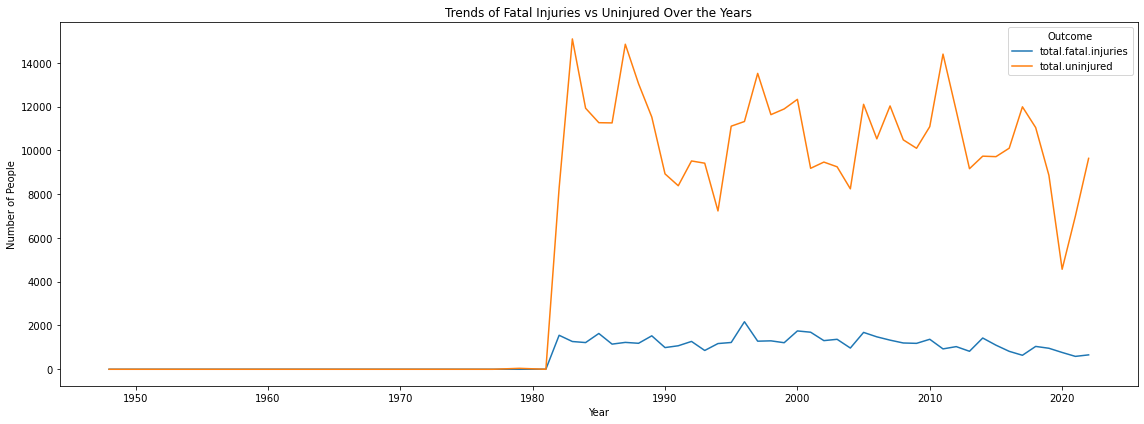

In [34]:
# Group the data by year, summing up total fatal injuries and total uninjured for each year
yearly_trends = df.groupby('year')[['total.fatal.injuries', 'total.uninjured']].sum()

# Plotting
# Create a line plot of yearly trends and Set figure size to (16,6) inches
# Add the title 
# Label both the x and y axis
# Add a legend with the title 'Outcome' to distinguish between fatal injuries and uninjured counts
# Adjust layout to prevent overlapping
# Display the plot
yearly_trends.plot(figsize=(16,6))
plt.title('Trends of Fatal Injuries vs Uninjured Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


Since 1980, aviation records show a clear rise in uninjured passengers, while fatal injuries have remained relatively low. This suggests improved safety measures and changes in how data is recorded over time.

 The growing gap between uninjured and fatal cases highlights better emergency responses, stronger aircraft design, and possibly stricter regulations that help reduce injury severity during accidents.

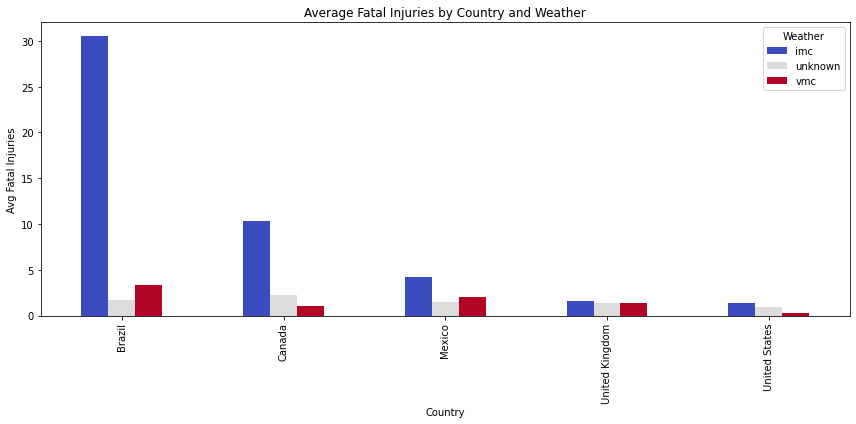

In [35]:
# Get top 5 countries by accident count

# Identify the top 5 countries with the most accidents by counting occurrences and taking the top 5 indices
# Create a subset of the DataFrame containing only rows where the country is in the top 5 list
top_countries = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top_countries)]

# Group the subset by country and weather condition, then compute the average number of fatal injuries for each combination
avg_fatal_by_country_weather = subset.groupby(['country', 'weather.condition'])['total.fatal.injuries'].mean().unstack()

# Ploting
# Plot the result as grouped bar chart with 'coolwarm 'as color map  set fig size to (12,6)inches
# Add the title
# label both x and y axis
# Add and title legend as weather to distinguish weather conditions
# Adjust layout to prevent overlapping
# Display the grouped bar chart
avg_fatal_by_country_weather.plot(kind='bar', figsize=(12,6), colormap='coolwarm')
plt.title('Average Fatal Injuries by Country and Weather')
plt.xlabel('Country')
plt.ylabel('Avg Fatal Injuries')
plt.legend(title='Weather')
plt.tight_layout()
plt.show()


                   Average Fatal Injuries by Country and Weather Condition

This bar chart visualizes the average number of fatal injuries across the top 5 countries with the highest number of aviation accidents, broken down by weather conditions (`IMC`, `VMC`, and `Unknown`).

- Brazil reports the highest fatal injury averages, especially under IMC (Instrument Meteorological Conditions), which typically involve low visibility and reliance on instruments.
- Canada also shows a high number of fatalities in IMC, with fewer cases under VMC (Visual Meteorological Conditions) or unknown conditions.
- Mexico, the United Kingdom, and the United States display lower average fatalities, though IMC conditions still stand out as a major contributing factor.

Fatal accidents are more frequent during IMC weather, indicating that flights conducted in low visibility or poor weather are riskier. This emphasizes the importance of enhanced pilot training, instrument reliability, and weather preparedness protocols to minimize fatalities in adverse conditions.


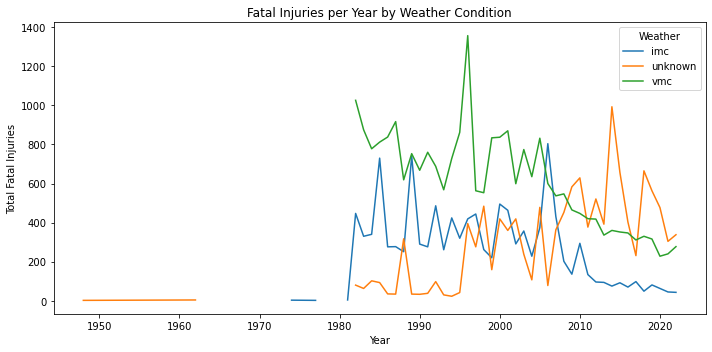

In [36]:
# Group total fatalities by year and weather condition

# Group data by year and weather condition, summing total fatal injuries, then reshape for plotting
fatal_by_year_weather = df.groupby(['year', 'weather.condition'])['total.fatal.injuries'].sum().unstack()

# Plotting 
# Plot the result as line graph and set figure size as(10,5)inches
# Set the title as year
# Label both x and y axis 
# Add and set legend title as weather 
# Adjust the layout
# Display the line graph
fatal_by_year_weather.plot(figsize=(10,5))
plt.title('Fatal Injuries per Year by Weather Condition')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.legend(title='Weather')
plt.tight_layout()
plt.show()


          Fatal Injuries Over Time by Weather Condition

This line plot tracks trends in total fatal injuries from 1980 to 2020, categorized by three weather conditions:

- VMC (Visual Meteorological Conditions): this category records the highest number of fatal injuries across most years. Notable spikes occur in the mid-1990s and around 2010. Although VMC allows pilots to navigate visually, the high accident count may be linked to greater flight activity during such conditions or pilot complacency.
  
- IMC (Instrument Meteorological Conditions): Fatal injuries in IMC—where visibility is poor and instrument navigation is necessary—are lower overall, though they still fluctuate. These accidents are likely tied to challenging weather and require high pilot skill and preparedness.

- Unknown Weather Conditions: These represent cases where weather data was not recorded or is unavailable. Fatalities in this group fall between VMC and IMC most of the time.

Despite appearing safer, VMC is associated with the highest number of fatal injuries, possibly due to higher flight traffic or risk-taking behavior in favorable weather. This finding highlights the importance of maintaining strict safety protocols even under seemingly ideal weather conditions.


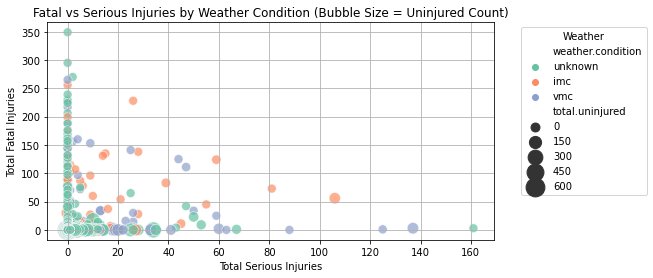

In [37]:
# Create a scatter plot with larger dots by scaling the 'total.uninjured' size
plt.figure(figsize=(8, 4))

# Plot using Seaborn with custom size scaling
sns.scatterplot(
    data=df,
    x='total.serious.injuries',
    y='total.fatal.injuries',
    hue='weather.condition',
    size='total.uninjured',
    sizes=(80, 400),
    alpha=0.7,
    palette='Set2'
)

# Add plot title and labels
plt.title('Fatal vs Serious Injuries by Weather Condition (Bubble Size = Uninjured Count)')
plt.xlabel('Total Serious Injuries')
plt.ylabel('Total Fatal Injuries')

# Improve legend visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Weather')
plt.grid(True)

# Display the plot
plt.show()


               Injury Distribution Across Weather Conditions

This bubble chart shows that most aviation incidents result in ower counts of both fatal and serious injuries. Incidents with high injuries in both categories are less common.

- Scattered distribution suggests that there isn't a strong or consistent pattern between fatal and serious injuries.
- All weather types (IMC, VMC, and Unknown) are represented across the full range, indicating that severe injuries can happen in any condition.
- Bubble sizes reveal that many incidents still result in uninjured individuals, especially when injuries are relatively low.

There’s no strong linear relationship between fatal and serious injuries. Even when injuries occur, many people still escape unharmed, which may reflect the effectiveness of safety systems or the nature of the incidents.


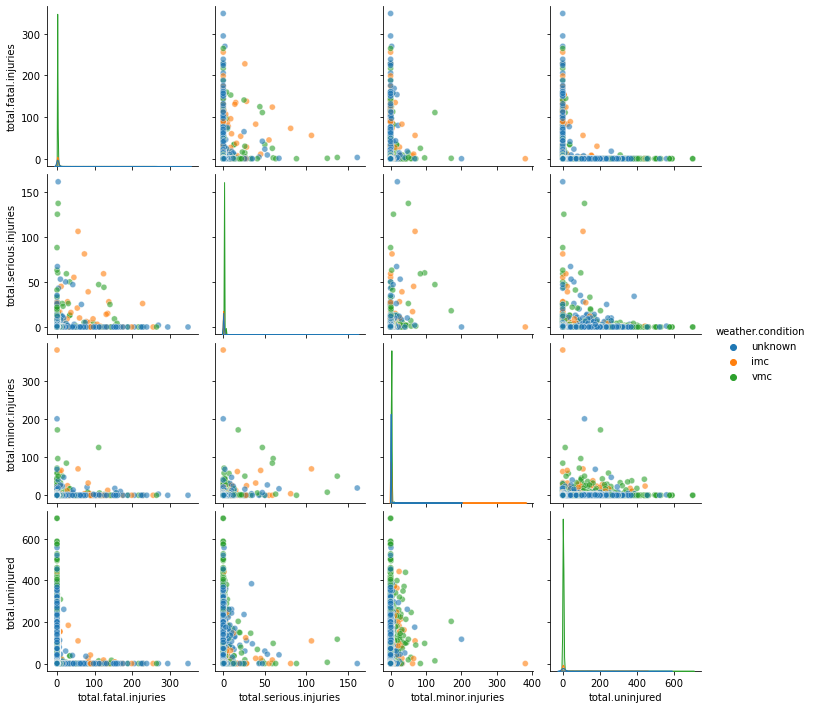

In [38]:
# Plot pairplot 

# Create a pairplot for selected injury columns and weather condition, colored by weather
# Column for fatal injuries
# Column for serious injuries
# Column for minor injuries
# Column for uninjured counts
# Column for weather categories
# Color points and plots by weather condition   
# Set transparency of the scatter points for clarity

sns.pairplot(
    df[['total.fatal.injuries', 'total.serious.injuries',
        'total.minor.injuries', 'total.uninjured', 'weather.condition']],
    hue='weather.condition',
    plot_kws={'alpha': 0.6}
)

# display pair plot
plt.show()


        Pair Plot : Injury  Relationships by Weather Condition

- Injury Types Are Related 
  - More fatal injuries often come with more serious injuries.  
  - Serious and minor injuries increase together.  
  - Minor injuries also tend to happen alongside more uninjured individuals.

- Most Incidents Are Low-Severity  
  - Data points are clustered near the lower ends, meaning most cases have few injuries.  
  - A few cases (outliers) show high numbers of injuries or uninjured individuals.

- Weather Conditions Have an Effect 
  - VMC (Visual Meteorological Conditions) shows wider variation in uninjured counts.  
  - IMC (Instrument Meteorological Conditions) is generally associated with lower variation.

 This plot helps reveal relationships between injury types and how different weather conditions may impact accident outcomes.


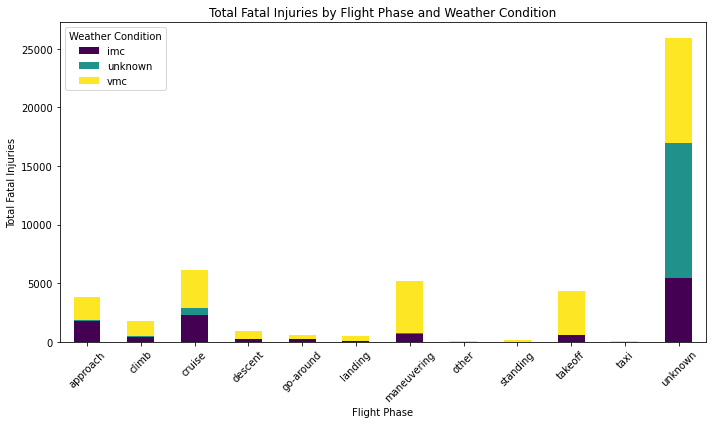

In [39]:
# Group the data by flight phase and weather condition, then sum fatalities
fatalities_phase_weather = df.groupby(
    ['broad.phase.of.flight', 'weather.condition']
)['total.fatal.injuries'].sum().unstack()

# Plot a stacked bar chart and set figure size to (10,6) inches use 'viridis ' as colormap
fatalities_phase_weather.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add titles and labels
# Rotate the x- axis labels for better readability
# Add and title the legend to distinguish weather conditions
# Adjust the layout
# display the stacked bar chart
plt.title('Total Fatal Injuries by Flight Phase and Weather Condition')
plt.xlabel('Flight Phase')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()


                Fatal Injuries by Flight Phase and Weather Condition

This chart explores how fatal injuries vary across flight phases and weather conditions:

- Highest Fatalities occur during the "unknown" flight phase, followed by cruise, maneuvering, approach, and takeoff.
- VMC (Visual Conditions) account for a large share of fatalities, especially in cruise, maneuvering, and takeof.
- IMC (Instrument Conditions) are heavily linked to fatalities during approach and cruise phases.
- **Unknown weather conditions still play a role, especially in the "unknown" flight phase

Most fatal injuries occur during in-flight operations like cruise and maneuvering, with weather conditions—particularly VMC and IMC are playing a significant role. This highlights the importance of weather-specific safety protocols, especially during critical flight phases.


In [40]:
# Count how many accidents happened in each broad phase of flight
phase_counts = df['broad.phase.of.flight'].value_counts()
print(phase_counts)

unknown        27669
landing        15382
takeoff        12471
cruise         10210
maneuvering     8085
approach        6482
climb           2028
taxi            1902
descent         1885
go-around       1353
standing         938
other            116
Name: broad.phase.of.flight, dtype: int64


     Summary of  my Analysis

In this notebook, I explored aviation accident data to uncover trends and patterns related to injury severity, weather conditions, and phases of flight. We began by loading and cleaning the dataset, focusing on key columns like fatal, serious, and minor injuries.

Through univariate analysis, bivariate analysis and multivariate analysis. I identified that most accidents occurred after 1980 and that fatal injuries are generally low in number compared to uninjured individuals. Bivariate and multivariate analyses revealed the following:

- VMC (Visual Meteorological Conditions) had the highest number of accidents and injuries.
- The "cruise" and "unknown" flight phases were linked to more fatal injuries.
- Despite serious or fatal injuries, many incidents still had passengers who were uninjured, showing the role of safety measures.
- There’s a positive correlation between fatal, serious, and minor injuries.
- Weather condition, flight phase, and injury types all interact in shaping accident outcomes.

This analysis helps highlight critical areas for improving aviation safety.
